In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow import keras
from PIL import Image
from collections import Counter


In [ ]:
import xmltodict
import cv2
from PIL import Image

def get_arrays_from_past_and_seq(past, seq):
	x_array = []
	y_array = []
	dir_imgs = past + str(seq) + "/imgs/"

	with open(past + str(seq) + "/annotations.xml", "rb") as org_file:
		dict_file = xmltodict.parse(org_file)

	arr_plants = dict_file["annotations"]["image"]

	for file in arr_plants:
		try:
			name_img = file["@name"]
			x_min = int(file["box"]["@xtl"])
			y_min = int(file["box"]["@ytl"])
			x_max = int(file["box"]["@xbr"])
			y_max = int(file["box"]["@ybr"]) 
			img = Image.open(dir_imgs + name_img)
			img = img.resize((576, 324)) # 0.3 = 576x324
			x_array.append(img)
			y_array.append([1])

		except:
			name_img = file["@name"]
			img = Image.open(dir_imgs + name_img)
			img = img.resize((576, 324))
			x_array.append(img)
			y_array.append([0])

	return x_array, y_array

past_and_last_seq_0 = ("RumexWeeds/20210806_hegnstrup/seq", 17)
past_and_last_seq_1 = ("RumexWeeds/20210806_stengard/seq", 20)
past_and_last_seq_2= ("RumexWeeds/20210807_lundholm/seq", 28)
past_and_last_seq_3 = ("RumexWeeds/20210908_lundholm/seq", 13)
past_and_last_seq_4 = ("RumexWeeds/20211006_stengard/seq", 15)

x_train = []
y_train = []

x_test = []
y_test = []

for i in range(past_and_last_seq_1[1]+1):
	x_aux, y_aux = get_arrays_from_past_and_seq(past_and_last_seq_1[0], i)
	x_train.extend(x_aux)
	y_train.extend(y_aux)

for i in range(past_and_last_seq_2[1]+1):
	x_aux, y_aux = get_arrays_from_past_and_seq(past_and_last_seq_2[0], i)
	x_test.extend(x_aux)
	y_test.extend(y_aux)

x_train = np.array(x_train)
y_train = np.array(y_train)

x_test = np.array(x_test)
y_test = np.array(y_test)

# 17 positivas
# 10 negativas SEQ0

print(x_train.shape)
print(x_test.shape)

#print(len(y_train))
# (580, 1200, 1920, 3)

In [ ]:
X_train = x_train
print(X_train.shape)
print(y_train.shape)

X_test = x_test
print(X_test.shape)


In [ ]:
best_activation = "inicial"
better_ac = 0

import matplotlib.pyplot as plt
import pandas as pd

dict_accuracy = {
	"relu":[],
	"sigmoid":[],
	"softmax":[],
	"tanh":[],
	"linear":[],
}

dict_something = {
	"relu":[],
	"sigmoid":[],
	"softmax":[],
	"tanh":[],
	"linear":[],
}

epochs = []

for x in range(2,31):
	epochs.append(x)

for i in ("relu", "sigmoid", "softmax", "tanh", "linear"):#
	for j in range(2, 31):
		convolutional_neural_network = models.Sequential([
			layers.Conv2D(filters=25, kernel_size=(3, 3), activation=i, input_shape=(32, 31, 3)),
			layers.MaxPooling2D((2, 2)),

			layers.Conv2D(filters=64, kernel_size=(3, 3), activation=i),
			layers.MaxPooling2D((2, 2)),

			layers.Conv2D(filters=64, kernel_size=(3, 3), activation=i),
			layers.MaxPooling2D((2, 2)),

			layers.Flatten(),
			layers.Dense(64, activation=i),
			layers.Dense(10, activation='softmax')
		])
		convolutional_neural_network.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
		convolutional_neural_network.fit(X_train, y_train, epochs=j)
		aux = convolutional_neural_network.evaluate(X_test,y_test)
		# convolutional_neural_network.summary()

		dict_accuracy[i].append(aux[1])
		dict_something[i].append(aux[0])


		if (better_ac < aux[1]):
			better_ac = aux[1]
			best_activation = i
			best_number_of_epochs = j

print("Melhor acurácia: ", better_ac)
print("Melhor activation: ", best_activation)
print("Melhor num epocas: ", best_number_of_epochs)

# for i in ("relu", "sigmoid", "softmax", "tanh", "linear"):
# 	plt.plot(dict_accuracy[i], epochs, marker='o', label = i)

data_frame = pd.DataFrame(dict_accuracy)
data_frame.to_csv("DeepLearningResults.csv", index = False)

# plt.xlabel("Epochs")
# plt.ylabel("Accuracy") 
# plt.show()

Epoch 1/2
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6525 - loss: 0.8459
Epoch 2/2
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8443 - loss: 0.3598
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8437 - loss: 0.3644
Epoch 1/3
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6318 - loss: 0.8355
Epoch 2/3
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8558 - loss: 0.3414
Epoch 3/3
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8975 - loss: 0.2507
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8965 - loss: 0.2536
Epoch 1/4
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6506 - loss: 0.8280
Epoch 2/4
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8527 - loss: 0.3527
Epoch 3/4
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8839 - loss: 0.2836
Epoch 4/4
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9122 - loss: 0.2072
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8983 - loss: 0.2293
Epoch 1/5
230/23

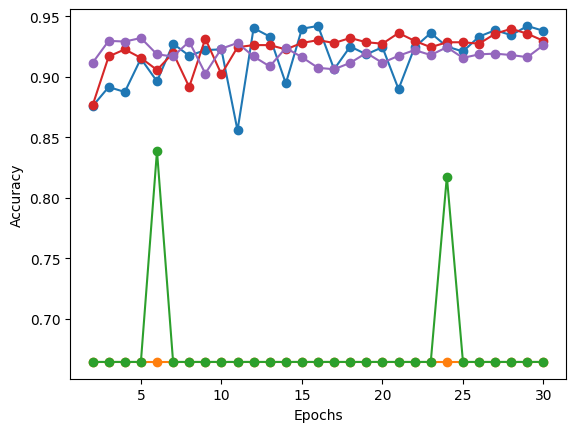

In [ ]:

# convolutional_neural_network.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# convolutional_neural_network.fit(X_train, y_train, epochs=10)
# returna = convolutional_neural_network.evaluate(X_test,y_test)

# print(returna)

for i in ("relu", "sigmoid", "softmax", "tanh", "linear"):
	plt.plot(epochs, dict_accuracy[i], marker='o', label = i)

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

img_width = 576
img_height = 324

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10)
aux = model.evaluate(X_test,y_test)

print("Acurácia: ", aux[1])

C:\Users\tadio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 125s 3s/step - accuracy: 0.6538 - loss: 251.8229
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 118s 2s/step - accuracy: 0.8580 - loss: 0.3486
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - accuracy: 0.9624 - loss: 0.1341
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step - accuracy: 0.9971 - loss: 0.0315
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - accuracy: 0.9981 - loss: 0.0088
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step - accuracy: 1.0000 - loss: 0.0083
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 116s 2s/step - accuracy: 1.0000 - loss: 3.9558e-04
Epoch 8/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 118s 2s/step - accuracy: 1.0000 - loss: 7.8094e-05
Epoch 9/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 145s 3s/step - accuracy: 1.0000 - loss: 2.5317e-05
Epoch 10/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 126s 3s/step - accuracy: 1.0000 - loss: 1.5092e-05
36/36 ━━━━━━━━━━━━━━━━━━━━ 16s 405ms/step - accuracy: 0.4149 - loss: 5.9723
Melhor acurácia:  0.45921987295150757
